In [19]:
import urllib.request
from bs4 import BeautifulSoup as soup
import requests
import re
import pandas as pd
import dataframe_image as dfi
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

rallyname = 'Central European'

link = 'https://rally-base.com/2023/central-european-rally-2023/?ssId='
startat, no_ss=7910, int(18) # starting number of url, count of Special Stages
canceled = []

stages = [number for number in range(no_ss)]


rally_23 = []

In [20]:
if canceled:
    for j in canceled: stages.remove(j-1)
#print(stages)


In [21]:
for ss in stages:
    val= startat + ss
    ss_a = str(val)
    my_url11 = link + ss_a
    #print(ss, val, ss_a, "\n", my_url11)
    
    req = urllib.request.Request(my_url11, headers={'User-Agent': 'Mozilla/5.0'})
    uClient11 = urllib.request.urlopen(req)
    page_html11 = uClient11.read()
    uClient11.close()
    data = pd.read_html(page_html11)[1]
   
    data.columns = data.iloc[0]
    data = data[1:]
    data['ss']=ss+1
    #print(data.columns)
    
    equal = '-' in data['Pos.'].unique()
    if equal:
        data['Pos.'] = data['Pos.'].replace('-', method='ffill')
    
    #data.to_csv('05_rally23_SS'+str(ss+1)+'.csv', index=False)

    rally_23.append(data)

In [22]:
rally2023_stages = pd.concat(rally_23, axis=0)
#rally2023_stages['Pos.'] = rally2023_stages['Pos.'].astype(str).astype(int)
rally2023_stages['No.'] = rally2023_stages['No.'].astype(str).astype(int)
#rally2023_stages.to_csv('03_rally2023.csv', index=False)
rally2023_stages = rally2023_stages.fillna("-")
rally2023_stages = rally2023_stages.rename(columns={'Driver / Co-driver Vehicle': "Crew"})
rally2023_stages['Race'] = rallyname
rally2023_stages['Crew'] = rally2023_stages['Crew'].str[:10]
rally2023_stages = rally2023_stages.sort_values(by=['Race', 'ss'])
rally2023_stages['cou']= rally2023_stages.groupby(['Race', 'ss']).cumcount()+1
rally2023_stages

,Pos.,No.,Crew,Group,SS time,Aver. speed sec/km,Diff.Leader Diff.Prev.,ss,Race,cou
1,1,8,Tänak Ott,RC1,00:01:51.2,82.55 0.00,00:00:00.0 00:00:00.0,1,Central European,1
2,2,17,Ogier S.,RC1,00:01:51.9,82.04 0.27,00:00:00.7 00:00:00.7,1,Central European,2
3,3,11,Neuville,RC1,00:01:52.2,81.82 0.39,00:00:01.0 00:00:00.3,1,Central European,3
4,4,4,Lappi Esa,RC1,00:01:52.8,81.38 0.63,00:00:01.6 00:00:00.6,1,Central European,4
5,5,3,Suninen T,RC1,00:01:53.6,80.81 0.94,00:00:02.4 00:00:00.8,1,Central European,5
...,...,...,...,...,...,...,...,...,...,...
50,50,54,Vossen He,RC2,00:12:03.4,81.47 12.28,00:03:21.1 00:00:00.4,18,Central European,50
51,51,79,Pahlitzsch,RC4,00:12:16.2,80.05 13.07,00:03:33.9 00:00:12.8,18,Central European,51
52,52,52,Díaz Aboit,RC2,00:13:22.3,73.45 17.10,00:04:40.0 00:01:06.1,18,Central European,52
53,53,80,Stejskal,RC5,00:17:05.2,57.48 30.72,00:08:22.9 00:03:42.9,18,Central European,53


In [23]:
rally2023_stageClass=rally2023_stages.drop(['Aver. speed sec/km', 'Diff.Leader Diff.Prev.', 'SS time', 'cou'], axis=1)
rally2023_stageTimes=rally2023_stages.drop(['Aver. speed sec/km', 'Diff.Leader Diff.Prev.', 'Pos.', 'cou'], axis=1)
rally2023_ClassView = rally2023_stageClass.set_index(['No.', 'Crew','Group','ss','Race'], drop=True).unstack('ss')
rally2023_TimeView = rally2023_stageTimes.set_index(['No.', 'Crew','Group', 'ss', 'Race'], drop=True).unstack('ss')
rally2023_ClassView = rally2023_ClassView.fillna("-")
rally2023_TimeView = rally2023_TimeView.fillna("-")
rally2023_stageClass2 = rally2023_stageClass.loc[((rally2023_stageClass['Group'] == 'RC1') | (rally2023_stageClass['Group'] == 'RC2'))] 
rally2023_ClassView2 = rally2023_stageClass2.set_index(['No.','Crew','Group','ss', 'Race'], drop=True).unstack('ss')
rally2023_ClassView2 = rally2023_ClassView2.fillna("-")


In [24]:
rally2023_ClassView.to_csv(str(rallyname) +'_Stages_Classification.csv')
rally2023_TimeView.to_csv(str(rallyname) + '_Stages_Times.csv',index=False)

In [25]:
pd.set_option("display.max_columns", None)

dfi.export(rally2023_ClassView2, (str(rallyname) + '_Stages_Classification.png'))


In [26]:
rally2023_ClassView

0                                     Pos.                                  \
ss                                      1   2   3   4   5   6   7   8   9    
No. Crew       Group Race                                                    
3   Suninen  T RC1   Central European    5   6   9   7   7   9   8   6   6   
4   Lappi  Esa RC1   Central European    4   4   2   2  57  56  55  53   -   
7   Loubet  P. RC1   Central European   14   7   7   8   9   8   7  43   7   
8   Tänak  Ott RC1   Central European    1   2   5   5   4   4   4   5   5   
11  Neuville   RC1   Central European    3   1   4   4   3   2   2   1   2   
...                                    ...  ..  ..  ..  ..  ..  ..  ..  ..   
77  Windischbe RC2   Central European   63  67   -   -   -   -   -   -   -   
78  Wilson  Co RC4   Central European   59  56  52  51  54  10  52  47  53   
79  Pahlitzsch RC4   Central European   67  60  57  55  55  10  54  52  55   
80  Stejskal   RC5   Central European   60  57  59  58  56  10  53  51  56   
81  Šekuljica  RC5   Central European   61  61  60  57  63  57  63  62  57   

0                                                                          
ss                                     10  11  12  13  14  15  16  17  18  
No. Crew       Group Race                                                  
3   Suninen  T RC1   Central European   7   2   7   5   4   4   5   5   6  
4   Lappi  Esa RC1   Central European   -   -   -   -   -   -   -   -   -  
7   Loubet  P. RC1   Central European   5   7   6   8  11   8   9  28  27  
8   Tänak  Ott RC1   Central European   4   5   3   2  13   5   4   4   5  
11  Neuville   RC1   Central European   1   1   2   3   2   3   6   3   2  
...                                    ..  ..  ..  ..  ..  ..  ..  ..  ..  
77  Windischbe RC2   Central European   -   -   -   -   -   -   -   -   -  
78  Wilson  Co RC4   Central European  47  40  48  50  44  52  52  50  47  
79  Pahlitzsch RC4   Central European  59  40  51  51  49  53  50  54  51  
80  Stejskal   RC5   Central European  52  40  52  52  50  56  53  52  53  
81  Šekuljica  RC5   Central European  60  60  59  57  56  55  54  53  54  

[67 rows x 18 columns]

In [27]:
rally2023_stages[['time_hh', 'time_mm','time_ss']] = rally2023_stages['SS time'].str.split(':', expand=True)
rally2023_stages['time_hh']= rally2023_stages['time_hh'].astype(str).astype(int,errors='ignore')
rally2023_stages['time_mm']= rally2023_stages['time_mm'].astype(str).astype(int,errors='ignore')
rally2023_stages['time_ss']= pd.to_numeric(rally2023_stages['time_ss'], errors='coerce')
rally2023_stages['time_SS_sec'] = rally2023_stages['time_hh']*3600 + rally2023_stages['time_mm']*60 + rally2023_stages['time_ss']
rally2023_stages = rally2023_stages.drop(['Pos.', 'SS time', 'Aver. speed sec/km',  'Diff.Leader Diff.Prev.', 'time_hh', 'time_mm', 'time_ss'], axis=1)
rally2023_stages.to_csv('../' + str(rallyname) + '_Stages_Times_Sec.csv',index=False)
rally2023_stages


,No.,Crew,Group,ss,Race,cou,time_SS_sec
1,8,Tänak Ott,RC1,1,Central European,1,111.2
2,17,Ogier S.,RC1,1,Central European,2,111.9
3,11,Neuville,RC1,1,Central European,3,112.2
4,4,Lappi Esa,RC1,1,Central European,4,112.8
5,3,Suninen T,RC1,1,Central European,5,113.6
...,...,...,...,...,...,...,...
50,54,Vossen He,RC2,18,Central European,50,723.4
51,79,Pahlitzsch,RC4,18,Central European,51,736.2
52,52,Díaz Aboit,RC2,18,Central European,52,802.3
53,80,Stejskal,RC5,18,Central European,53,1025.2


In [28]:
min_value = rally2023_stages.groupby(['Race', 'ss'])['time_SS_sec'].min()
min_value_G = rally2023_stages.groupby(['Race', 'ss', 'Group'])['time_SS_sec'].min()
#min_value = pd.DataFrame(min_value)

min_value2 =  pd.DataFrame(min_value)
min_value2_G =  pd.DataFrame(min_value_G)

min_value2_G = min_value2_G.rename(columns={'time_SS_sec' : 'min_time_Gr'})
min_value2 = min_value2.rename(columns={'time_SS_sec' : 'min_time'})
min_value2_G

min_time_Gr
Race             ss Group             
Central European 1  RC1          111.2
                    RC2          115.0
                    RC3          125.8
                    RC4          129.7
                    RC5          150.6
...                                ...
                 18 RC2          553.5
                    RC3          604.7
                    RC4          615.2
                    RC5         1025.2
                    RGT          668.5

[108 rows x 1 columns]

In [29]:
ss_times_F_G = rally2023_stages.merge(min_value2_G, on=['Race', 'ss', 'Group'])
ss_times_F = ss_times_F_G.merge(min_value2, on=['Race', 'ss'])
ss_times_F

,No.,Crew,Group,ss,Race,cou,time_SS_sec,min_time_Gr,min_time
0,8,Tänak Ott,RC1,1,Central European,1,111.2,111.2,111.2
1,17,Ogier S.,RC1,1,Central European,2,111.9,111.2,111.2
2,11,Neuville,RC1,1,Central European,3,112.2,111.2,111.2
3,4,Lappi Esa,RC1,1,Central European,4,112.8,111.2,111.2
4,3,Suninen T,RC1,1,Central European,5,113.6,111.2,111.2
...,...,...,...,...,...,...,...,...,...
1077,67,Rada Mart,RGT,18,Central European,42,668.5,668.5,522.3
1078,66,Nešetřil,RGT,18,Central European,43,674.7,668.5,522.3
1079,65,Fumal Arm,RGT,18,Central European,49,723.0,668.5,522.3
1080,80,Stejskal,RC5,18,Central European,53,1025.2,1025.2,522.3


In [30]:
ss_times_F['diff']=ss_times_F['time_SS_sec'] - ss_times_F['min_time']
ss_times_F['diff%']=(ss_times_F['time_SS_sec'] - ss_times_F['min_time'])/ss_times_F['min_time']*100
ss_times_F['SS.']=ss_times_F['ss'].apply(lambda x: '{0:0>2}'.format(x))
ss_times_F['diff_Gr']=ss_times_F['time_SS_sec'] - ss_times_F['min_time_Gr']
ss_times_F['diff_Gr%']=(ss_times_F['time_SS_sec'] - ss_times_F['min_time_Gr'])/ss_times_F['min_time_Gr']*100
ss_times_F

,No.,Crew,Group,ss,Race,cou,time_SS_sec,min_time_Gr,min_time,diff,diff%,SS.,diff_Gr,diff_Gr%
0,8,Tänak Ott,RC1,1,Central European,1,111.2,111.2,111.2,0.0,0.000000,01,0.0,0.000000
1,17,Ogier S.,RC1,1,Central European,2,111.9,111.2,111.2,0.7,0.629496,01,0.7,0.629496
2,11,Neuville,RC1,1,Central European,3,112.2,111.2,111.2,1.0,0.899281,01,1.0,0.899281
3,4,Lappi Esa,RC1,1,Central European,4,112.8,111.2,111.2,1.6,1.438849,01,1.6,1.438849
4,3,Suninen T,RC1,1,Central European,5,113.6,111.2,111.2,2.4,2.158273,01,2.4,2.158273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1077,67,Rada Mart,RGT,18,Central European,42,668.5,668.5,522.3,146.2,27.991576,18,0.0,0.000000
1078,66,Nešetřil,RGT,18,Central European,43,674.7,668.5,522.3,152.4,29.178633,18,6.2,0.927450
1079,65,Fumal Arm,RGT,18,Central European,49,723.0,668.5,522.3,200.7,38.426192,18,54.5,8.152580
1080,80,Stejskal,RC5,18,Central European,53,1025.2,1025.2,522.3,502.9,96.285660,18,0.0,0.000000


In [31]:
Group = 'RC1'
ss_times_WRC = ss_times_F[ss_times_F['Group'].str.contains(Group)]
#ss_times_WRC = ss_times_F[ss_times_F['Group'].str.contains('|'.join(['RC1', 'RC2']))]
ss_times_WRC

,No.,Crew,Group,ss,Race,cou,time_SS_sec,min_time_Gr,min_time,diff,diff%,SS.,diff_Gr,diff_Gr%
0,8,Tänak Ott,RC1,1,Central European,1,111.2,111.2,111.2,0.0,0.000000,01,0.0,0.000000
1,17,Ogier S.,RC1,1,Central European,2,111.9,111.2,111.2,0.7,0.629496,01,0.7,0.629496
2,11,Neuville,RC1,1,Central European,3,112.2,111.2,111.2,1.0,0.899281,01,1.0,0.899281
3,4,Lappi Esa,RC1,1,Central European,4,112.8,111.2,111.2,1.6,1.438849,01,1.6,1.438849
4,3,Suninen T,RC1,1,Central European,5,113.6,111.2,111.2,2.4,2.158273,01,2.4,2.158273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1032,8,Tänak Ott,RC1,18,Central European,5,529.7,522.3,522.3,7.4,1.416810,18,7.4,1.416810
1033,3,Suninen T,RC1,18,Central European,6,531.1,522.3,522.3,8.8,1.684855,18,8.8,1.684855
1034,13,Munster G,RC1,18,Central European,7,533.5,522.3,522.3,11.2,2.144361,18,11.2,2.144361
1035,69,Rovanperä,RC1,18,Central European,8,539.5,522.3,522.3,17.2,3.293127,18,17.2,3.293127


In [32]:
ss_times_WRC

,No.,Crew,Group,ss,Race,cou,time_SS_sec,min_time_Gr,min_time,diff,diff%,SS.,diff_Gr,diff_Gr%
0,8,Tänak Ott,RC1,1,Central European,1,111.2,111.2,111.2,0.0,0.000000,01,0.0,0.000000
1,17,Ogier S.,RC1,1,Central European,2,111.9,111.2,111.2,0.7,0.629496,01,0.7,0.629496
2,11,Neuville,RC1,1,Central European,3,112.2,111.2,111.2,1.0,0.899281,01,1.0,0.899281
3,4,Lappi Esa,RC1,1,Central European,4,112.8,111.2,111.2,1.6,1.438849,01,1.6,1.438849
4,3,Suninen T,RC1,1,Central European,5,113.6,111.2,111.2,2.4,2.158273,01,2.4,2.158273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1032,8,Tänak Ott,RC1,18,Central European,5,529.7,522.3,522.3,7.4,1.416810,18,7.4,1.416810
1033,3,Suninen T,RC1,18,Central European,6,531.1,522.3,522.3,8.8,1.684855,18,8.8,1.684855
1034,13,Munster G,RC1,18,Central European,7,533.5,522.3,522.3,11.2,2.144361,18,11.2,2.144361
1035,69,Rovanperä,RC1,18,Central European,8,539.5,522.3,522.3,17.2,3.293127,18,17.2,3.293127


In [33]:
ss_times_F3 =ss_times_WRC.drop(['Group','time_SS_sec','cou', 'ss'], axis=1)
ss_times_F4 = pd.pivot_table(ss_times_F3, values='diff_Gr', 
                                index='Crew', 
                                columns=['Race', 'SS.'])
ss_times_F4

Race       Central European                                                \
SS.                      01    02    03    04     05     06     07     08   
Crew                                                                        
Evans  Elf              3.9   7.8   3.4  14.6    6.4    0.0    9.7   11.1   
Katsuta  T              3.4   7.7  18.9  25.8   28.6   13.7   26.4   32.0   
Lappi  Esa              1.6   3.0   1.8  10.1  600.0  600.0  600.0  600.0   
Loubet  P.              4.4   7.0  18.4  30.9   37.9   14.6   30.7  303.1   
Munster  G              2.8  13.2  15.3  32.0   34.7   11.5   34.1   45.2   
Neuville                1.0   0.0   4.5  19.5   12.0    1.1    8.0    0.0   
Ogier  S.               0.7   6.1  41.9  41.4   21.2   13.3   24.2   16.8   
Rovanperä               4.0   2.9   0.0   0.0    0.0    1.7    0.0    1.1   
Suninen  T              2.4   6.9  21.6  28.7   30.7   17.8   33.9   26.8   
Tänak  Ott              0.0   2.2   9.6  23.5   15.4    8.6   17.6   23.2   

Race                                                                        
SS.           09    10     11     12     13     14    15    16    17    18  
Crew                                                                        
Evans  Elf   0.0   3.8  600.0  600.0  600.0  600.0   1.8   0.0   9.7   0.0  
Katsuta  T  13.7  25.6    7.3    4.9    8.4    4.4   5.4   6.6   3.3   6.2  
Lappi  Esa   NaN   NaN    NaN    NaN    NaN    NaN   NaN   NaN   NaN   NaN  
Loubet  P.  11.7  16.9    9.3    9.0   19.7   25.1   9.3  39.3  71.1  79.9  
Munster  G  19.8  18.3    4.6   17.2   19.0   17.4  14.1  14.1  11.8  11.2  
Neuville     1.3   0.0    0.0    1.5    3.5    0.5   3.2  10.8   3.6   3.5  
Ogier  S.    4.3  10.6    3.2    0.0    0.0    9.4   0.0   4.6   0.0   4.9  
Rovanperä    2.1  24.7   22.0    4.9   15.7    0.0   7.4  18.2   9.7  17.2  
Suninen  T  10.8  18.9    2.3   13.2   10.3    7.4   3.3   7.6   8.9   8.8  
Tänak  Ott   9.7  12.3    4.9    4.5    0.1   30.4   4.6   7.0   5.8   7.4

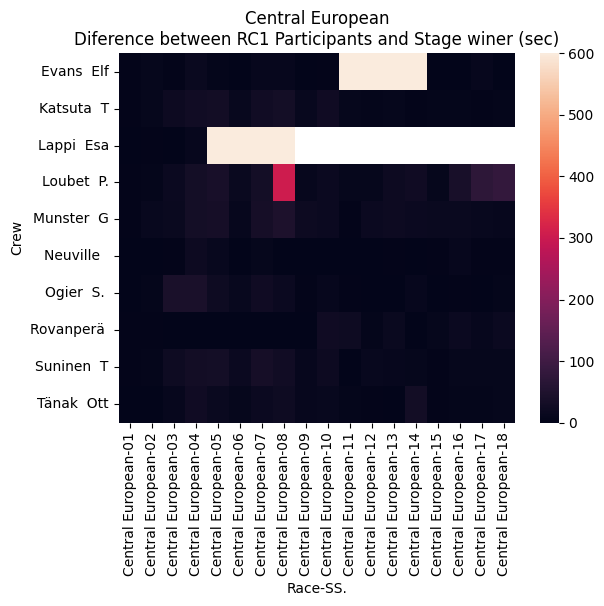

In [34]:
Heatmap_ALL = sns.heatmap(ss_times_F4)
plt.title(rallyname+'\nDiference between '+ Group + ' Participants and Stage winer (sec)')
plt.savefig("Heatmap_" + Group + ".png")

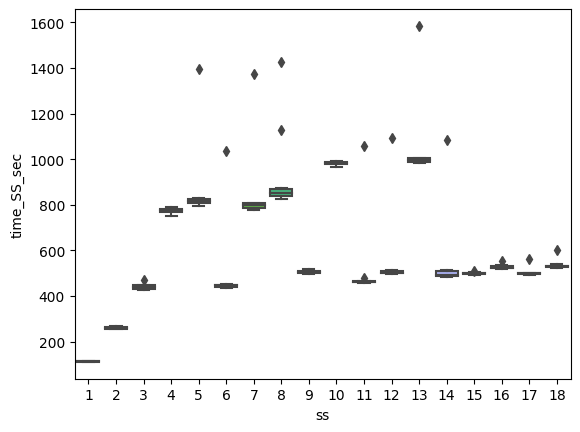

In [35]:
bplt=sns.boxplot( y=ss_times_WRC["time_SS_sec"], x=ss_times_WRC["ss"])
#plt.savefig("Boxplot__" + Group + ".png")

Text(0.5, 1.0, 'Central European\nDiference between RC1 Participants and Stage winer (%)')

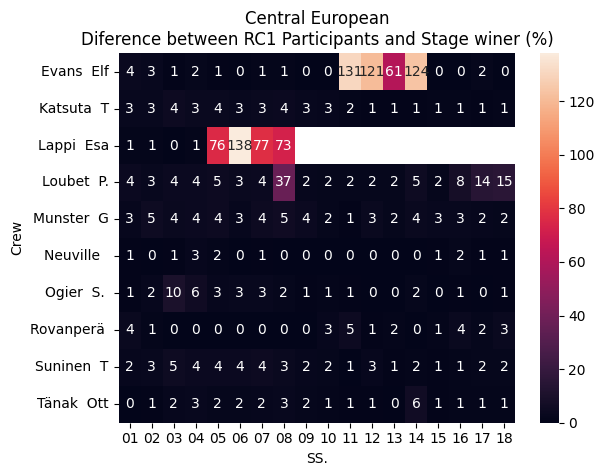

In [36]:
ss_timesa = pd.pivot_table(ss_times_WRC, values='diff_Gr%', 
                                index='Crew', 
                                columns=['SS.'])
Heatmap_ = sns.heatmap(ss_timesa, annot=True, fmt=',.0f')
plt.title(rallyname +'\nDiference between ' + Group + ' Participants and Stage winer (%)')
#plt.savefig( Group + ".jpg")